# MNIST 이미지 인식

## 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

Using TensorFlow backend.
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hwa-kim/opt/anaconda3/lib/pytho

In [3]:
# !pip install tensorflow

In [4]:
# !pip install keras

## MNIST 이미지 확인

<function matplotlib.pyplot.show(*args, **kw)>

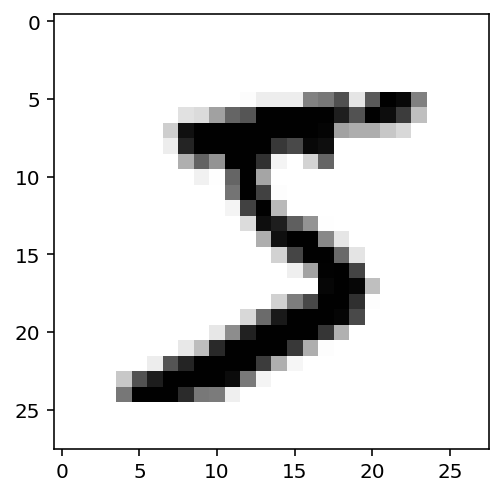

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

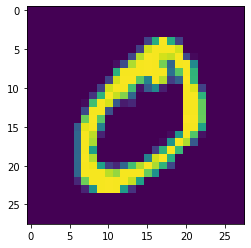

In [6]:
plt.imshow(train_images[1])

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터를 입력으로 사용한다
- 목적 변수는 원 핫 인코딩을 한다. to_categorical를 사용한다

In [9]:
train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [10]:
train_labels_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# MLP 모델

In [21]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.fit(train_images_flat, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.8672
Epoch 2/3
938/938 [==============================] - 2s 3ms/step - loss: 0.1274 - accuracy: 0.9619
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0878 - accuracy: 0.9735


In [24]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9723
test_acc =  0.9722999930381775


# CNN 모델

In [15]:
train_images_cnn = train_images.reshape(60000,28,28,1)
test_images_cnn = test_images.reshape(10000,28,28,1)

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [17]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model.fit(train_images_cnn, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 33s 4ms/step - loss: 1.7553 - accuracy: 0.8573
Epoch 2/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0680 - accuracy: 0.9810
Epoch 3/3
938/938 [==============================] - 3s 4ms/step - loss: 0.0441 - accuracy: 0.9878


In [19]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9848
test_acc =  0.9847999811172485


# MLP를 이용한  회귀 예측

In [3]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape

(404, 13)

In [4]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (13,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

In [5]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [6]:
history = model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=1,
       )


Epoch 1/32
404/404 [==============================] - 2s 4ms/step - loss: 575.7854
Epoch 2/32
404/404 [==============================] - 0s 536us/step - loss: 557.5909
Epoch 3/32
404/404 [==============================] - 0s 557us/step - loss: 538.8052
Epoch 4/32
404/404 [==============================] - 0s 555us/step - loss: 520.8304
Epoch 5/32
404/404 [==============================] - 0s 551us/step - loss: 493.3655
Epoch 6/32
404/404 [==============================] - 0s 539us/step - loss: 464.7700
Epoch 7/32
404/404 [==============================] - 0s 567us/step - loss: 433.3595
Epoch 8/32
404/404 [==============================] - 0s 500us/step - loss: 388.6853
Epoch 9/32
404/404 [==============================] - 0s 467us/step - loss: 346.8071
Epoch 10/32
404/404 [==============================] - 0s 517us/step - loss: 318.5818
Epoch 11/32
404/404 [==============================] - 0s 468us/step - loss: 271.0795
Epoch 12/32
404/404 [==============================] - 0s 475us/

In [7]:
model.predict(np.reshape(x_test[100], [1,13]))

array([[26.838245]], dtype=float32)

In [8]:
y_test[100]

26.7

In [9]:
history.history.keys()

dict_keys(['loss'])

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [52]:
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']

KeyError: 'mean_absolute_error'

In [ ]:
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [49]:
loss = history.history['loss']
acc = history.history['r
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
mape_loss=history.history['mean_absolute_percentage_error']
cosine_los=history.history['cosine_proximity']
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

KeyError: 'mean_absolute_error'

In [47]:
a,b = model.evaluate(x_test, y_test)
# print('score = ',score)

102/102 [==============================] - 0s 58us/step


TypeError: cannot unpack non-iterable float object